In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import *
import nltk, datetime
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train = pd.read_csv('../input/sales_train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv('../input/sample_submission.csv')
items = pd.read_csv('../input/items.csv')
item_cats = pd.read_csv('../input/item_categories.csv')
shops = pd.read_csv('../input/shops.csv')

print(train.shape , test.shape)
print(train[:3])
print(test[:3])

['items.csv', 'shops.csv', 'sales_train.csv', 'test.csv', 'item_categories.csv', 'sample_submission.csv']
(2935849, 6) (214200, 3)
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233


In [76]:
#difference between train and test
#[c for c in train.columns if c not in test.columns]
#another good way above mentione to run loop in python
a = []
for c in train.columns:
    if c not in test.columns:
        #print(c)
        a = c
print(a)


item_cnt_day


In [77]:
train.head() # train is loaded as dataframe using pandas read.csv

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
test.head()

In [ ]:
items.head()

In [78]:
#bag of words
feature_count = 25
#creation of bag of words using tokenization technique(i.e extraction of words seperated by delimeter here 'space')
#one hot encoding
text_feature_frame= feature_extraction.text.TfidfVectorizer(max_features=feature_count)  #metadata about the vectoried text
items['items_name_len'] = items['item_name'].map(len) 
print(items['items_name_len'])
items['items_name_wc'] = items['item_name'].map(lambda x : len(str(x).split(' ')))
print(items['items_name_wc'])

0        41
1        68
2        45
3        47
4        43
5        51
6        40
7        42
8        40
9        45
10       41
11       41
12       31
13       41
14       41
15       38
16       26
17       31
18       41
19       25
20       18
21       15
22       20
23       17
24       20
25       11
26       32
27       33
28       39
29       38
         ..
22140    13
22141    17
22142    22
22143    15
22144    23
22145    20
22146    17
22147    21
22148    15
22149    24
22150    16
22151    14
22152    23
22153    12
22154    17
22155    42
22156    46
22157     7
22158     9
22159     9
22160    26
22161    32
22162     6
22163    16
22164    11
22165    38
22166    47
22167    53
22168    19
22169    29
Name: items_name_len, Length: 22170, dtype: int64
0        14
1         9
2        26
3        26
4        25
5        18
6        19
7        19
8        24
9        16
10       26
11       29
12        6
13       29
14       16
15        5
16        3
17        4
18

In [79]:
print(text_feature_frame) #metadata about the vectoried text

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=25, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [80]:
#counting
text_feature = text_feature_frame.fit_transform(items['item_name']).toarray()  #one hot encoding
#print(text_feature)
text_feature = pd.DataFrame(text_feature)
print(text_feature)

             0         1         2        3         4    5    6         7   \
0      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
1      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.637898   
2      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
3      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
4      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
5      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
6      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
7      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
8      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
9      0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
10     0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.000000   
11     0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.0

In [81]:
col = text_feature.columns
for i in range(feature_count):
    items['item_name_trnsfrmindf_' +str(i)] = text_feature[col[i]]

In [82]:
items.head()

,item_name,item_id,item_category_id,items_name_len,items_name_wc,item_name_trnsfrmindf_0,item_name_trnsfrmindf_1,item_name_trnsfrmindf_2,item_name_trnsfrmindf_3,item_name_trnsfrmindf_4,...,item_name_trnsfrmindf_15,item_name_trnsfrmindf_16,item_name_trnsfrmindf_17,item_name_trnsfrmindf_18,item_name_trnsfrmindf_19,item_name_trnsfrmindf_20,item_name_trnsfrmindf_21,item_name_trnsfrmindf_22,item_name_trnsfrmindf_23,item_name_trnsfrmindf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [83]:
# for item_cats
feature_count = 25
text_feature_frame= feature_extraction.text.TfidfVectorizer(max_features=feature_count)  #metadata about the vectoried text  #object form 
item_cats['item_category_name_len'] = item_cats['item_category_name'].map(len) 
print(item_cats['item_category_name_len'])
item_cats['item_category_name_wc'] =item_cats['item_category_name'].map(lambda x : len(str(x).split(' ')))
print(item_cats['item_category_name_wc'])

0     23
1     16
2     16
3     16
4     16
5     19
6     21
7     21
8     14
9     15
10    21
11    21
12    21
13    21
14    24
15    26
16    26
17    24
18    10
19    10
20    10
21    10
22    13
23    15
24    15
25    25
26    20
27    16
28    32
29    31
      ..
54    13
55    35
56    35
57    12
58    14
59    26
60    27
61    20
62    32
63    24
64    25
65    38
66    28
67    18
68    29
69    18
70    30
71    40
72    17
73    28
74    23
75    28
76    36
77    21
78    29
79     9
80    18
81    23
82    25
83    16
Name: item_category_name_len, Length: 84, dtype: int64
0     3
1     3
2     3
3     3
4     3
5     3
6     4
7     4
8     2
9     2
10    4
11    4
12    4
13    4
14    4
15    5
16    5
17    4
18    3
19    3
20    3
21    3
22    3
23    4
24    4
25    5
26    4
27    4
28    5
29    5
     ..
54    3
55    5
56    5
57    3
58    3
59    4
60    4
61    3
62    5
63    4
64    4
65    5
66    4
67    3
68    4
69    3
70    5
71    6
72  

In [84]:
text_Features = pd.DataFrame(text_feature_frame.fit_transform(item_cats['item_category_name']).toarray()) #text_feature_frame is an object , #text_Features is a data frame holding one hot encoding
#print(text_Features)
col = text_Features.columns #again col is an object holding 25 col data
for i in range(feature_count):
    item_cats['item_category_name_tfidf_' + str(i)] = text_Features[col[i]]

In [85]:
item_cats.head()

,item_category_name,item_category_id,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,PC - Гарнитуры/Наушники,0,23,3,0.0,0.0,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Аксессуары - PS2,1,16,3,0.0,0.0,0.0,0.0,0.780837,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Аксессуары - PS3,2,16,3,0.0,0.0,0.0,0.0,0.000000,0.780837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Аксессуары - PS4,3,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Аксессуары - PSP,4,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#shops
feature_count = 25
text_feature_frame= feature_extraction.text.TfidfVectorizer(max_features=feature_count)  #metadata about the vectoried text  #object form 
shops['shop_name_len'] = shops['shop_name'].map(len) 
print(shops['shop_name_len'])
shops['shop_name_wc'] =shops['shop_name'].map(lambda x : len(str(x).split(' ')))
print(shops['shop_name_wc'])


0     29
1     29
2     16
3     30
4     24
5     22
6     26
7     22
8     28
9     17
10    26
11    26
12    19
13    19
14    23
15    20
16    16
17    29
18    20
19    21
20    19
21    22
22    18
23    32
24    32
25    19
26    27
27    30
28    31
29    34
30    22
31    23
32    26
33    17
34    20
35    27
36    37
37    21
38    14
39    37
40    47
41    22
42    22
43    15
44    19
45    20
46    21
47    22
48    28
49    21
50    18
51    25
52    20
53    16
54    15
55    24
56    20
57    23
58    23
59    22
Name: shop_name_len, dtype: int64
0     4
1     4
2     3
3     3
4     4
5     3
6     3
7     3
8     4
9     2
10    4
11    4
12    2
13    3
14    4
15    4
16    3
17    4
18    3
19    3
20    2
21    4
22    3
23    4
24    4
25    3
26    4
27    6
28    6
29    5
30    3
31    3
32    4
33    3
34    3
35    3
36    4
37    3
38    3
39    4
40    5
41    3
42    4
43    3
44    3
45    3
46    4
47    4
48    4
49    3
50    3
51    4
52    3
53

In [88]:
text_Features = pd.DataFrame(text_feature_frame.fit_transform(shops['shop_name']).toarray()) #text_feature_frame is an object , #text_Features is a data frame holding one hot encoding
#print(text_Features)
col = text_Features.columns #again col is an object holding 25 col data
for i in range(feature_count):
    shops['shop_name_tfidf_' + str(i)] = text_Features[col[i]]

In [89]:
shops.head()

,shop_name,shop_id,shop_name_len,shop_name_wc,shop_name_tfidf_0,shop_name_tfidf_1,shop_name_tfidf_2,shop_name_tfidf_3,shop_name_tfidf_4,shop_name_tfidf_5,...,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
0,"!Якутск Орджоникидзе, 56 фран",0,29,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.322815,0.0,0.689588,0.648274
2,"Адыгея ТЦ ""Мега""",2,16,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.498580,0.0,0.000000,0.000000
3,"Балашиха ТРК ""Октябрь-Киномир""",3,30,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.000000
4,"Волжский ТЦ ""Волга Молл""",4,24,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.423972,0.0,0.000000,0.000000


In [90]:
#train
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [91]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [92]:
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
#drop by default works on rows , for columns axis =1 
train = train.drop(['date','item_price'], axis=1)

In [93]:
train.head()

,date_block_num,shop_id,item_id,item_cnt_day,month,year
0,0,59,22154,1.0,1,2013
1,0,25,2552,1.0,1,2013
2,0,25,2552,-1.0,1,2013
3,0,25,2554,1.0,1,2013
4,0,25,2555,1.0,1,2013


In [94]:
train = train.groupby([c for c in train.columns if c not in 'item_cnt_day'], as_index=False)['item_cnt_day'].sum()  #as_index=false means grouped by elements are no longer index in dataframe
#[c for c in train.columns if c not in ['item_cnt_day']]
train.head()
#now rename item_cnt_day to item_cnt_month
train = train.rename(columns={'item_cnt_day':'item_cnt_month'})


In [95]:
#findng monthly mean
monthly_mean_shop_item = train[['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)['item_cnt_month'].mean()
#print(monthly_mean_shop_item)
monthly_mean_shop_item = monthly_mean_shop_item.rename(columns={'item_cnt_month':'month_mean_shop_item'})
print(monthly_mean_shop_item)
#finding mean
train = pd.merge(train,monthly_mean_shop_item ,how = "left" , on = ['shop_id','item_id'])


        shop_id  item_id  month_mean_shop_item
0             0       30             31.000000
1             0       31             11.000000
2             0       32              8.000000
3             0       33              3.000000
4             0       35              7.500000
5             0       36              1.000000
6             0       40              1.000000
7             0       42              1.000000
8             0       43              1.000000
9             0       49              2.000000
10            0       51              2.500000
11            0       57              1.000000
12            0       59              1.000000
13            0       61              1.000000
14            0       75              1.000000
15            0       85              1.000000
16            0       88              1.000000
17            0       95              1.000000
18            0       96              1.000000
19            0       97              1.000000
20           

In [22]:
train.tail(10)

,date_block_num,shop_id,item_id,month,year,item_cnt_month,month_mean_shop_item
1609114,33,59,21427,10,2015,1.0,1.562500
1609115,33,59,21449,10,2015,2.0,2.000000
1609116,33,59,21672,10,2015,1.0,1.000000
1609117,33,59,21811,10,2015,1.0,1.000000
1609118,33,59,21812,10,2015,1.0,1.000000
1609119,33,59,22087,10,2015,6.0,6.424242
1609120,33,59,22088,10,2015,2.0,6.187500
1609121,33,59,22091,10,2015,1.0,2.294118
1609122,33,59,22100,10,2015,1.0,1.000000
1609123,33,59,22102,10,2015,1.0,1.333333


In [96]:
#Last Month 
#let`s work with year 2015(10) datablock no 33
shop_item_prev_month = train[train['date_block_num'] == 33][['shop_id','item_id','item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns={'item_cnt_month':'item_cnt_prev_month'})
print(shop_item_prev_month)


         shop_id  item_id  item_cnt_prev_month
1577593        2       31                  1.0
1577594        2      486                  3.0
1577595        2      787                  1.0
1577596        2      794                  1.0
1577597        2      968                  1.0
1577598        2      988                  1.0
1577599        2     1075                  1.0
1577600        2     1121                  1.0
1577601        2     1377                  1.0
1577602        2     1387                  1.0
1577603        2     1389                  1.0
1577604        2     1466                  2.0
1577605        2     1486                  1.0
1577606        2     1523                  1.0
1577607        2     1534                  1.0
1577608        2     1535                  1.0
1577609        2     1540                  2.0
1577610        2     1556                  1.0
1577611        2     1560                  1.0
1577612        2     1563                  1.0
1577613      

In [97]:
#Add previous month features with train data
#also do some cleaning by replacing all nan value or null values
train = pd.merge(train,shop_item_prev_month, how='left',on=['shop_id','item_id']).fillna(0.)


In [98]:
train.tail()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,month_mean_shop_item,item_cnt_prev_month
1609119,33,59,22087,10,2015,6.0,6.424242,6.0
1609120,33,59,22088,10,2015,2.0,6.187500,2.0
1609121,33,59,22091,10,2015,1.0,2.294118,1.0
1609122,33,59,22100,10,2015,1.0,1.000000,1.0
1609123,33,59,22102,10,2015,1.0,1.333333,1.0


In [99]:
items.head()

,item_name,item_id,item_category_id,items_name_len,items_name_wc,item_name_trnsfrmindf_0,item_name_trnsfrmindf_1,item_name_trnsfrmindf_2,item_name_trnsfrmindf_3,item_name_trnsfrmindf_4,...,item_name_trnsfrmindf_15,item_name_trnsfrmindf_16,item_name_trnsfrmindf_17,item_name_trnsfrmindf_18,item_name_trnsfrmindf_19,item_name_trnsfrmindf_20,item_name_trnsfrmindf_21,item_name_trnsfrmindf_22,item_name_trnsfrmindf_23,item_name_trnsfrmindf_24
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483839
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [100]:
train = pd.merge(train,items,how='left',on=['item_id'])

In [102]:
train.tail()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,month_mean_shop_item,item_cnt_prev_month,item_name,item_category_id,...,item_name_trnsfrmindf_15,item_name_trnsfrmindf_16,item_name_trnsfrmindf_17,item_name_trnsfrmindf_18,item_name_trnsfrmindf_19,item_name_trnsfrmindf_20,item_name_trnsfrmindf_21,item_name_trnsfrmindf_22,item_name_trnsfrmindf_23,item_name_trnsfrmindf_24
1609119,33,59,22087,10,2015,6.0,6.424242,6.0,Элемент питания DURACELL LR03-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609120,33,59,22088,10,2015,2.0,6.187500,2.0,Элемент питания DURACELL LR06-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609121,33,59,22091,10,2015,1.0,2.294118,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609122,33,59,22100,10,2015,1.0,1.000000,1.0,Энциклопедия Adventure Time,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609123,33,59,22102,10,2015,1.0,1.333333,1.0,Энциклопедия Мир Ведьмака,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
item_cats.tail()

,item_category_name,item_category_id,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
79,Служебные,79,9,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,Служебные - Билеты,80,18,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,Чистые носители (шпиль),81,23,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,Чистые носители (штучные),82,25,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,Элементы питания,83,16,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
#listing all column headers of train df
list(train.columns.values)

['date_block_num',
 'shop_id',
 'item_id',
 'month',
 'year',
 'item_cnt_month',
 'month_mean_shop_item',
 'item_cnt_prev_month',
 'item_name',
 'item_category_id',
 'items_name_len',
 'items_name_wc',
 'item_name_trnsfrmindf_0',
 'item_name_trnsfrmindf_1',
 'item_name_trnsfrmindf_2',
 'item_name_trnsfrmindf_3',
 'item_name_trnsfrmindf_4',
 'item_name_trnsfrmindf_5',
 'item_name_trnsfrmindf_6',
 'item_name_trnsfrmindf_7',
 'item_name_trnsfrmindf_8',
 'item_name_trnsfrmindf_9',
 'item_name_trnsfrmindf_10',
 'item_name_trnsfrmindf_11',
 'item_name_trnsfrmindf_12',
 'item_name_trnsfrmindf_13',
 'item_name_trnsfrmindf_14',
 'item_name_trnsfrmindf_15',
 'item_name_trnsfrmindf_16',
 'item_name_trnsfrmindf_17',
 'item_name_trnsfrmindf_18',
 'item_name_trnsfrmindf_19',
 'item_name_trnsfrmindf_20',
 'item_name_trnsfrmindf_21',
 'item_name_trnsfrmindf_22',
 'item_name_trnsfrmindf_23',
 'item_name_trnsfrmindf_24']

In [105]:
train = pd.merge(train , item_cats , how='left',on=[ 'item_category_id'])

In [106]:
train.tail()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,month_mean_shop_item,item_cnt_prev_month,item_name,item_category_id,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
1609119,33,59,22087,10,2015,6.0,6.424242,6.0,Элемент питания DURACELL LR03-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609120,33,59,22088,10,2015,2.0,6.187500,2.0,Элемент питания DURACELL LR06-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609121,33,59,22091,10,2015,1.0,2.294118,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609122,33,59,22100,10,2015,1.0,1.000000,1.0,Энциклопедия Adventure Time,42,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1609123,33,59,22102,10,2015,1.0,1.333333,1.0,Энциклопедия Мир Ведьмака,42,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
#shop features merge to train df
train = pd.merge(train , shops, how = 'left' , on=['shop_id'])

In [108]:
train.tail()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,month_mean_shop_item,item_cnt_prev_month,item_name,item_category_id,...,shop_name_tfidf_15,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24
1609119,33,59,22087,10,2015,6.0,6.424242,6.0,Элемент питания DURACELL LR03-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1609120,33,59,22088,10,2015,2.0,6.187500,2.0,Элемент питания DURACELL LR06-BC2,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1609121,33,59,22091,10,2015,1.0,2.294118,1.0,Элемент питания DURACELL TURBO LR 03 2*BL,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1609122,33,59,22100,10,2015,1.0,1.000000,1.0,Энциклопедия Adventure Time,42,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1609123,33,59,22102,10,2015,1.0,1.333333,1.0,Энциклопедия Мир Ведьмака,42,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#playing with test dataset
test.tail()


In [ ]:
monthly_mean_shop_item .tail()

In [ ]:
shop_item_prev_month.tail()

In [ ]:
items.tail()

In [109]:
test['month']=11
test['year'] = 2015
test['date_block_num'] =34
test.tail()


,ID,shop_id,item_id,month,year,date_block_num
214195,214195,45,18454,11,2015,34
214196,214196,45,16188,11,2015,34
214197,214197,45,15757,11,2015,34
214198,214198,45,19648,11,2015,34
214199,214199,45,969,11,2015,34


In [110]:
#till oct 2015 we have data in train data set now we need to predict for nov 2015 sales for each product
test = pd.merge(test,monthly_mean_shop_item ,how='left',on=['shop_id','item_id']).fillna(0.)
test = pd.merge(test,shop_item_prev_month,how='left',on=['shop_id','item_id']).fillna(0.)
test = pd.merge(test,items,how='left',on=['item_id'])
test = pd.merge(test,item_cats,how='left',on=['item_category_id'])
test = pd.merge(test,shops,how='left',on=['shop_id'])
#test['item_cnt_month']=0.



In [ ]:
test.tail()

In [111]:
test['item_cnt_month']=0.

In [112]:
test['item_cnt_month'].values


array([0., 0., 0., ..., 0., 0., 0.])

In [113]:
test.tail()

,ID,shop_id,item_id,month,year,date_block_num,month_mean_shop_item,item_cnt_prev_month,item_name,item_category_id,...,shop_name_tfidf_16,shop_name_tfidf_17,shop_name_tfidf_18,shop_name_tfidf_19,shop_name_tfidf_20,shop_name_tfidf_21,shop_name_tfidf_22,shop_name_tfidf_23,shop_name_tfidf_24,item_cnt_month
214195,214195,45,18454,11,2015,34,1.800000,1.0,СБ. Союз 55,55,...,0.0,0.0,0.0,0.0,0.0,0.293728,0.0,0.0,0.0,0.0
214196,214196,45,16188,11,2015,34,0.000000,0.0,Настольная игра Нано Кёрлинг,64,...,0.0,0.0,0.0,0.0,0.0,0.293728,0.0,0.0,0.0,0.0
214197,214197,45,15757,11,2015,34,1.166667,0.0,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,...,0.0,0.0,0.0,0.0,0.0,0.293728,0.0,0.0,0.0,0.0
214198,214198,45,19648,11,2015,34,0.000000,0.0,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,...,0.0,0.0,0.0,0.0,0.0,0.293728,0.0,0.0,0.0,0.0
214199,214199,45,969,11,2015,34,1.666667,0.0,3 ДНЯ НА УБИЙСТВО (BD),37,...,0.0,0.0,0.0,0.0,0.0,0.293728,0.0,0.0,0.0,0.0


In [ ]:
list(test.columns.values)

In [ ]:
list(train.columns.values)

In [114]:
#visualization
import matplotlib.pyplot as plt #to construct plot area
import seaborn as sns  #for sstatistical data visulaization 
from PIL import Image, ImageDraw, ImageFilter
#%matplotlib inline #to plot data inline in the notebook itself
df_all = pd.concat((train, test), axis=0, ignore_index=True)


In [115]:
print(df_all)

               ID  date_block_num  item_category_id  \
0             NaN               0                40   
1             NaN               0                37   
2             NaN               0                40   
3             NaN               0                40   
4             NaN               0                57   
5             NaN               0                43   
6             NaN               0                40   
7             NaN               0                40   
8             NaN               0                40   
9             NaN               0                40   
10            NaN               0                40   
11            NaN               0                57   
12            NaN               0                45   
13            NaN               0                45   
14            NaN               0                45   
15            NaN               0                45   
16            NaN               0                45   
17        

In [ ]:
list(df_all.columns.values)

In [116]:
#fill_value for nan`s 
stores_hm = df_all.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0)
#fig, ax = plt.subplots(figsize=(10,10))
#_ = sns.heatmap(stores_hm, ax=ax, cbar=False)

In [ ]:
stores_hm.tail()

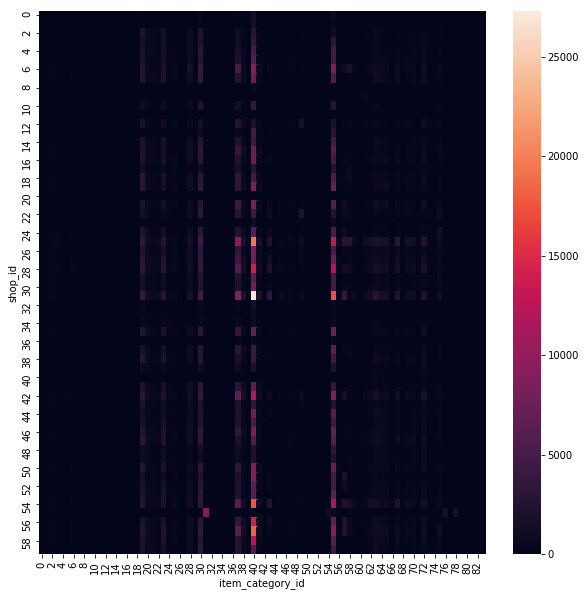

In [117]:
#This plot is for count of  products(items) sold under category for different shops in all years including predictabl yr 2015 nov
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
#generating heat map
ax = sns.heatmap(stores_hm, ax=ax, cbar=True) #cbar means colorbar , az means matplotlib Axes (optional)

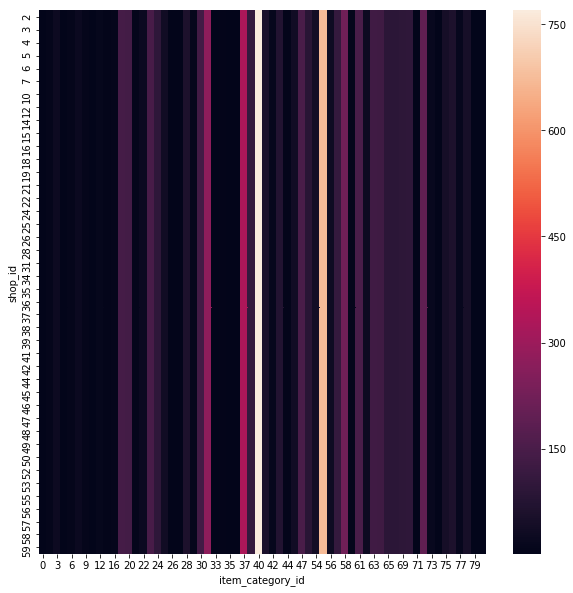

In [118]:
#this plot contains count of items sold under particular category for certain shops on nov 2015 (predictable month)
stores_hm = test.pivot_table(index='shop_id', columns='item_category_id', values='item_cnt_month', aggfunc='count', fill_value=0) #here in values we can use any item_cnt_month or item_cnt_prev_month
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
#generating heat map
ax = sns.heatmap(stores_hm, ax=ax, cbar=True) #cbar means colorbar , az means matplotlib Axes (optional)

In [ ]:
stores_hm.tail()

In [119]:
for c in ['shop_name','item_name','item_category_name']:
    #Preprocessing
    #transforming the prediction target (Label Encoding)
    le = preprocessing.LabelEncoder()
    le.fit(list(train[c].unique())+list(test[c].unique()))
    #list(le.classes_)
    train[c] = le.fit_transform(train[c].astype(str))
    test[c] = le.fit_transform(test[c].astype(str))
    print(c)
    
    



shop_name
item_name
item_category_name


In [120]:
print(train['item_category_name'])

0          40
1          37
2          40
3          40
4          57
5          43
6          40
7          40
8          40
9          40
10         40
11         57
12         45
13         45
14         45
15         45
16         45
17         45
18         45
19         45
20         45
21         45
22         73
23         73
24         73
25         49
26         77
27         77
28         77
29         77
           ..
1609094    37
1609095    30
1609096    40
1609097    40
1609098    72
1609099    72
1609100    72
1609101    72
1609102    72
1609103    72
1609104    72
1609105    72
1609106    72
1609107    71
1609108    41
1609109    40
1609110    40
1609111    40
1609112    40
1609113    40
1609114    40
1609115    40
1609116    38
1609117    37
1609118    40
1609119    83
1609120    83
1609121    83
1609122    42
1609123    42
Name: item_category_name, Length: 1609124, dtype: int64


In [121]:
#Training Models from train dataset
col = [c for c in train.columns if c not in ['item_cnt_month']]  #because item_cnt_month needs to be predicted on the basis of previous results
print(col)

['date_block_num', 'shop_id', 'item_id', 'month', 'year', 'month_mean_shop_item', 'item_cnt_prev_month', 'item_name', 'item_category_id', 'items_name_len', 'items_name_wc', 'item_name_trnsfrmindf_0', 'item_name_trnsfrmindf_1', 'item_name_trnsfrmindf_2', 'item_name_trnsfrmindf_3', 'item_name_trnsfrmindf_4', 'item_name_trnsfrmindf_5', 'item_name_trnsfrmindf_6', 'item_name_trnsfrmindf_7', 'item_name_trnsfrmindf_8', 'item_name_trnsfrmindf_9', 'item_name_trnsfrmindf_10', 'item_name_trnsfrmindf_11', 'item_name_trnsfrmindf_12', 'item_name_trnsfrmindf_13', 'item_name_trnsfrmindf_14', 'item_name_trnsfrmindf_15', 'item_name_trnsfrmindf_16', 'item_name_trnsfrmindf_17', 'item_name_trnsfrmindf_18', 'item_name_trnsfrmindf_19', 'item_name_trnsfrmindf_20', 'item_name_trnsfrmindf_21', 'item_name_trnsfrmindf_22', 'item_name_trnsfrmindf_23', 'item_name_trnsfrmindf_24', 'item_category_name', 'item_category_name_len', 'item_category_name_wc', 'item_category_name_tfidf_0', 'item_category_name_tfidf_1', 'ite

In [122]:
x1 = train[train['date_block_num']<33] #33 means before oct 2015
y1 = np.log1p(x1['item_cnt_month'].clip(0.,20.))  #result set 
#Clip (limit) the values in an array.Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
x1 = x1[col] #without including result set 'item_cnt_month' (data before oct 2015)
print(x1)

         date_block_num  shop_id  item_id  month  year  month_mean_shop_item  \
0                     0        0       32      1  2013              8.000000   
1                     0        0       33      1  2013              3.000000   
2                     0        0       35      1  2013              7.500000   
3                     0        0       43      1  2013              1.000000   
4                     0        0       51      1  2013              2.500000   
5                     0        0       61      1  2013              1.000000   
6                     0        0       75      1  2013              1.000000   
7                     0        0       88      1  2013              1.000000   
8                     0        0       95      1  2013              1.000000   
9                     0        0       96      1  2013              1.000000   
10                    0        0       98      1  2013             15.000000   
11                    0        0      11

In [124]:
x2 = train[train['date_block_num']==33]  #33 means oct 2015
y2 = np.log1p(x2['item_cnt_month'].clip(0.,20.))
x2 = x2[col]
#print(x2)

In [125]:
print(x2)

         date_block_num  shop_id  item_id  month  year  month_mean_shop_item  \
1577593              33        2       31     10  2015              1.600000   
1577594              33        2      486     10  2015              1.777778   
1577595              33        2      787     10  2015              1.000000   
1577596              33        2      794     10  2015              1.000000   
1577597              33        2      968     10  2015              1.000000   
1577598              33        2      988     10  2015              1.000000   
1577599              33        2     1075     10  2015              1.500000   
1577600              33        2     1121     10  2015              1.000000   
1577601              33        2     1377     10  2015              1.000000   
1577602              33        2     1387     10  2015              3.333333   
1577603              33        2     1389     10  2015              4.000000   
1577604              33        2     146

In [126]:
#training on x1 and y1 i.e less then oct 2015`s data
reg = ensemble.ExtraTreesRegressor(n_estimators=25, n_jobs=-1, max_depth=15, random_state=18) #n_estimators(by default 10) no of trees in a forest, n_jobs=-1 means hen the number of jobs is set to the number of cores. #random_state is seed value
#Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression)
#ensemble learning on decsion trees
reg.fit(x1,y1) #building forest trees  #reg(model)
#Root Mean Square between train(true-train df(for oct 2015 i.e x2 y2)) and prediction
#error
#test for nov 2015`s  prediction on the basis of oct 2015 data 
#what we got accuracy is of about 0.8
print ('RMSE:',np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.),reg.predict(x2).clip(0.,20.)))) #reg.predict - Predict regression target for X.


RMSE: 0.27761484673085673


In [55]:
print(train[col])

         date_block_num  shop_id  item_id  month  year  month_mean_shop_item  \
0                     0        0       32      1  2013              8.000000   
1                     0        0       33      1  2013              3.000000   
2                     0        0       35      1  2013              7.500000   
3                     0        0       43      1  2013              1.000000   
4                     0        0       51      1  2013              2.500000   
5                     0        0       61      1  2013              1.000000   
6                     0        0       75      1  2013              1.000000   
7                     0        0       88      1  2013              1.000000   
8                     0        0       95      1  2013              1.000000   
9                     0        0       96      1  2013              1.000000   
10                    0        0       98      1  2013             15.000000   
11                    0        0      11

In [129]:
#training on full training set(including oct 2015)
reg.fit(train[col],train['item_cnt_month'].clip(0.,20.))
test['item_cnt_month'] = 0.
test['item_cnt_month'] = reg.predict(test[col]).clip(0.,20.) # reg.predict- Predict regression target for X.#and put inside test file where item_cnt_month is zero
print(test[['ID','item_cnt_month']])
#print(test['item_cnt_month])
#test[['ID','shop_name','item_name','item_category_name','item_cnt_month']].to_csv('submission.csv', index=False)

            ID  item_cnt_month
0            0        1.029353
1            1        0.221616
2            2        1.400912
3            3        0.934595
4            4        0.315984
5            5        1.356241
6            6        2.061019
7            7        1.388725
8            8        3.366668
9            9        0.297484
10          10        3.341618
11          11        0.929388
12          12        0.982929
13          13        1.432250
14          14        2.410033
15          15        4.986517
16          16        0.449342
17          17        0.982885
18          18        2.260523
19          19        0.865273
20          20        1.626829
21          21        0.422466
22          22        2.231492
23          23        1.409676
24          24        2.597426
25          25        0.217484
26          26        0.400056
27          27        1.234189
28          28        1.958024
29          29        5.756854
...        ...             ...
214170  

In [131]:
#prdiction for nov 2015 
print(test[['ID','shop_name','item_name','item_category_name','item_cnt_month']])

            ID  shop_name  item_name  item_category_name  item_cnt_month
0            0          3       1195                  11        1.029353
1            1          3       1254                  39        0.221616
2            2          3       1239                  11        1.400912
3            3          3       1238                  15        0.934595
4            4          3       1245                  12        0.315984
5            5          3       1197                  15        1.356241
6            6          3       1198                  12        2.061019
7            7          3       1202                  39        1.388725
8            8          3       1253                  39        3.366668
9            9          3       1184                  12        0.297484
10          10          3       1121                  22        3.341618
11          11          3       1129                  12        0.929388
12          12          3       1083               

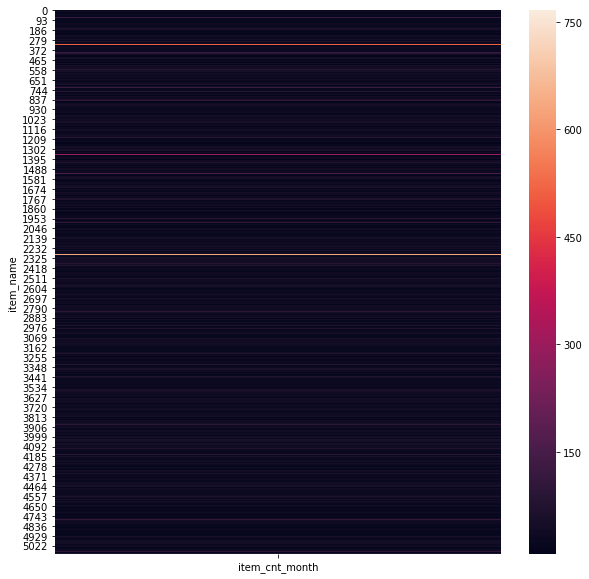

In [140]:
stores_hm =test.pivot_table(index='item_name', values='item_cnt_month', aggfunc='sum', fill_value=0)
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
#generating heat map
ax = sns.heatmap(stores_hm, ax=ax, cbar=True)
#ax = sns.barplot(x="item_name", y="Prediction(nov15)", data=stores_hm ,label="Total", color="b")